# Salary Predictions Based on Job Descriptions

# Step 4: Deploy

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [2]:
import sys
sys.path.insert(0, './scripts')

from helpers import load_data
from Preprocessing import Preprocessing

## Automating the Pipeline

I need to load in the cleaned training data and the testing data. I'll then set up the Pipeline object to automatically preprocess the data and train the model on the preprocessed data.

In [3]:
path = './cleaned_data/'
files = ['cleaned.csv']
train_data = pd.DataFrame()

for file in files:
    train_data = train_data.append(load_data(path, file))

print(train_data.shape)
train_data.head()

(991513, 8)


,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
jobId,,,,,,,,
JOB1362684407687,130,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
JOB1362684407688,101,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
JOB1362684407689,137,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
JOB1362684407690,142,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
JOB1362684407691,163,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
path = './raw_data/'
file = 'test_features.csv'
features_test = load_data(path, file)

In [5]:
target = ['salary']
features = [col for col in train_data.columns if col not in target]

features_train = train_data[features]
salary_train = train_data[target]

In [6]:
cols_to_filter = ['companyId']
ordinal_cols = {'jobType': ['JANITOR', 'JUNIOR', 'SENIOR', 'MANAGER', 'VICE_PRESIDENT', 'CFO', 'CTO', 'CEO'],
                'degree': ['NONE', 'HIGH_SCHOOL', 'BACHELORS', 'MASTERS', 'DOCTORAL']
               }
binned_cols = {'yearsExperience': 5}
p = Preprocessing(cols_to_filter=cols_to_filter, ordinal_cols=ordinal_cols,
                  binned_cols=binned_cols, grad_types=True,
                  combo=True                          
                 )
rf = RandomForestRegressor(max_depth=25, min_samples_leaf=17, max_features=.35,
                           n_estimators=100, n_jobs=-1, random_state=44        
                          )

pipeline = Pipeline([('preprocessing', p), ('Random Forest', rf)])

## Deploying the solution

In [7]:
# Fitting the pipeline
pipeline.fit(features_train, salary_train.values.ravel())
salary_pred = pipeline.predict(features_test)

In [8]:
%%bash
rm -r ./final_output
mkdir ./final_output

In [9]:
# Saving predicted salaries to an external csv
salary_pred = pd.Series(salary_pred, index=features_test.index)
salary_pred.to_csv('./final_output/test_salaries.csv', header=True)

Outputting the trained model using joblib allows me to not need to train the model in every application that I'd like to use it for. I'll be saving it along with the predictions csv in a folder labeled 'final_output'

In [10]:
# Saving the trained model for further use if necessary for others
import joblib
joblib.dump(pipeline, './final_output/final_model.joblib')

['./final_output/final_model.joblib']

## Measuring Efficacy 
I cannot perform this last step because I do not have the solutions to the testing data.

## Final Summary

Text(0.5, 1.0, 'Relative Importance of Features')

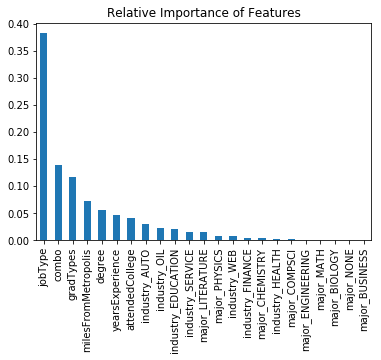

In [11]:
columns = pipeline.steps[0][1].transform(features_train.iloc[0:1,:]).columns
importances = pipeline.steps[1][1].feature_importances_

importance = pd.Series(importances, index=columns).sort_values(ascending=False)
ax = importance.plot.bar()
ax.set_title('Relative Importance of Features')

By far, the most important feature in the building of the Random Forest model was the *jobType* feature. I still think that there is some untapped potential in the *major* and *industry* features.

## What I'd Change in the Future

The biggest change that needs to happen on my next project is more efficient and productive EDA and Feature Engineering. To achieve this, I'll spend more time investigating the business problem and gaining domain knowledge that could help me set a plan for data investigation. I want to go into EDA with a plan that is then altered instead of meandering all possibilities to find patterns that may or may not exist within the data itself. I'll also be researching the finer points of Feature Engineering to possibly enhance my approach to creating new features. I believe I had a good intuition for transforming the categorical columns the way I did, but I don't believe I did as good a job as I could to create new information.

On the software engineering side of things, I would implement proper unit testing for my Preprocessing object and various helper functions. I might be able to refactor some of the steps in my fit and transform methods so that my code is less procedural and more modular. As of 6/13/19, I have not added these changes to my code, but I might at a future date and will update all projects and scripts appropriately. 